# TP 2 Egalisation d'histogrammes
Dans ce TP, nous aimerions améliorer le contraste d'images par deux méthodes. Une méthode d'expansion de la dynamique, et une méthode d'égalisaton d'histogramme. La première image à traiter est dans un fichier csv à loader. Le reste des images sont dans le même dossier. 

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Lire et afficher l'image à utiliser
Pour ce TP, nous allons lire les données à partir de fichier csv.

In [4]:
image = np.genfromtxt('image.csv', delimiter=';', dtype=int)

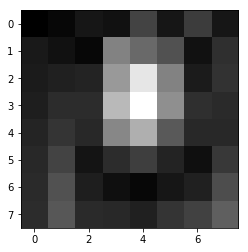

In [5]:
plt.imshow(image,cmap='gray')

# Calculer les métriques sur l'image
1.	Calculer la moyenne de luminance de l’image.
2.	Donner la dynamique de l’image (intervalle [Lmin, Lmax]).
3.	Calculer le contraste de l’image.
4.	Calculer l’écart type des niveaux de gris de l’image.


In [6]:
def imageMetrics(image):
    Lmean = # à compléter
    Lmin = # à compléter
    Lmax = # à compléter
    contrast= # à compléter
    H = # à compléter
    W = # à compléter
    
    # partie écart type
    ######
    # bloc de calcul
    ######
    std=# à compléter
    
    print('Image metrics :\nmean '+str(Lmean)+' Lmin '+
          str(Lmin)+' Lmax '+str(Lmax)+' contrast '+
          str(round(contrast,3))+' std '+str(round(std,3)))
    
    return Lmean, Lmin, Lmax, contrast, std

# Histogramme et histogramme cumulé
5.	Construire l’histogramme de cette image ainsi que son histogramme normalisé.
6.	Construire l’histogramme cumulé de cette image ainsi que son histogramme cumulé normalisé.


In [7]:
# histogramme de l'image
def histogram(image):
    L=256 
    hist = np.zeros(L)
    H = image.shape[0]
    W = image.shape[1]
    for i in range(H):
        for j in range(W):
            # à compléter
    return hist

In [8]:
# histogramme normalisé de l'image
def Nhistogram(image):
    hist=histogram(image)
    H = image.shape[0]
    W = image.shape[1]
    # à compléter
    return histN

In [9]:
# histogramme cumulé de l'image
def Chistogram(image):
    hist=histogram(image)
    histC=np.zeros((hist.shape))
    histC[0]=hist[0]
    for i in range(1,hist.shape[0]):
        # à compléter
    return histC

In [10]:
# histogramme cumulé normalisé de l'image
def NChistogram(image):
    Chist=Chistogram(image)
    histCN=# à compléter
    # même résultat en cumulant l'histogramme normalisé
    return histCN

# Amélioration du Contraste
7.	Améliorer le contraste de l'image par égalisation d'histogramme.
8.  Améliorer le contraste de l'image par expansion de la dynamique.


In [11]:
# amélioer le contraste par égalisation d'histogramme
def equalisation(image):
    imageNew=np.zeros((image.shape[0],image.shape[1]))
    histCN=NChistogram(image)
    L=255
    H = image.shape[0]
    W = image.shape[1]
    # minimum =/=0
    # à compléter
    #####
    # bloc de calcul
    #####
    return imageNew

In [12]:
# amélioer le contraste par expansion de la dynamique
def expansion(image):
    maxI=np.max(np.max(image))
    minI=np.min(np.min(image))
    image=# à compléter
    return image

# Afficher les histogrammes

<BarContainer object of 256 artists>

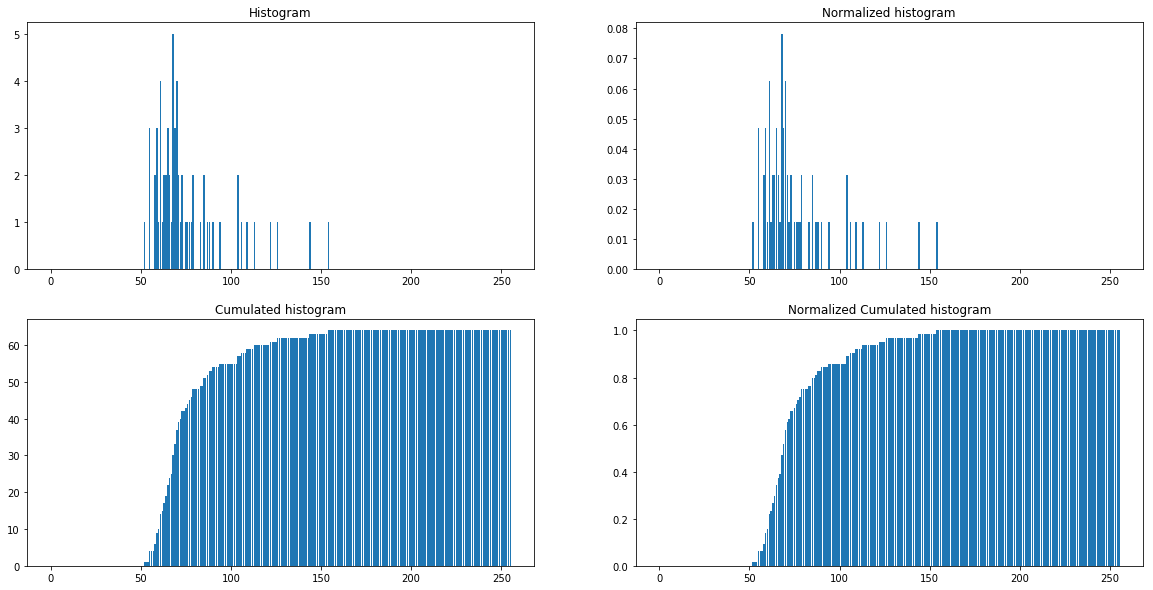

In [22]:
L=256
bins=[i for i in range(L)]
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title('Histogram')
plt.bar(bins,histogram(image))
plt.subplot(2,2,2)
plt.title('Normalized histogram')
plt.bar(bins,Nhistogram(image))
plt.subplot(2,2,3)
plt.title('Cumulated histogram')
plt.bar(bins,Chistogram(image))
plt.subplot(2,2,4)
plt.title('Normalized Cumulated histogram')
plt.bar(bins,NChistogram(image))

Comparer avec d'autres librairies

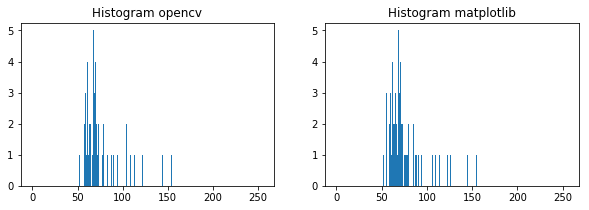

In [14]:
bins=[i for i in range(L)]
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title('Histogram opencv')
dst = cv2.calcHist([np.float32(image)], [0], None, [256], [0, 256])
# identique à
#dst = cv2.calcHist([image.astype('uint8')], [0], None, [256], [0, 256])
plt.bar(bins,dst.flatten())
plt.subplot(1,2,2)
plt.title('Histogram matplotlib')
a=plt.hist(image.flatten(), bins)

# Tester sur la petite image

<BarContainer object of 256 artists>

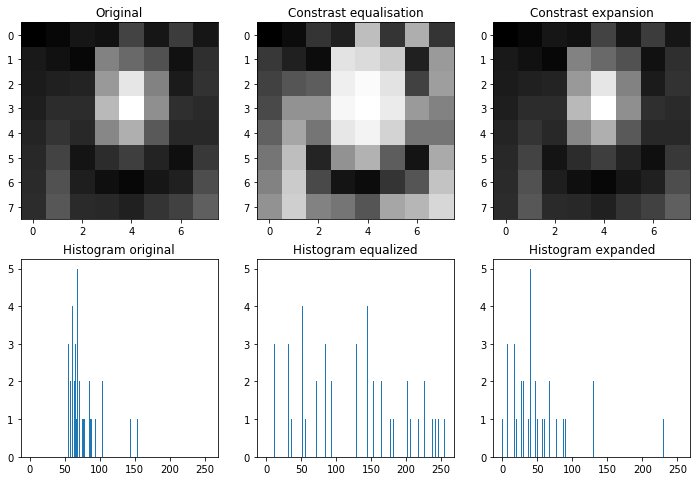

In [15]:
bins=[i for i in range(L)]
imageEq=equalisation(image)
imageEx=expansion(image)
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
plt.title('Original')
plt.imshow(image,cmap='gray')
plt.subplot(2,3,2)
plt.title('Constrast equalisation')
plt.imshow(imageEq,cmap='gray')
plt.subplot(2,3,3)
plt.title('Constrast expansion')
plt.imshow(imageEx,cmap='gray')
plt.subplot(2,3,4)
plt.title('Histogram original')
plt.bar(bins,histogram(image))
plt.subplot(2,3,5)
plt.title('Histogram equalized')
plt.bar(bins,histogram(imageEq))
plt.subplot(2,3,6)
plt.title('Histogram expanded')
plt.bar(bins,histogram(imageEx))


# Appliquer sur les autres images


In [ ]:
bins=[i for i in range(L)]

<BarContainer object of 256 artists>

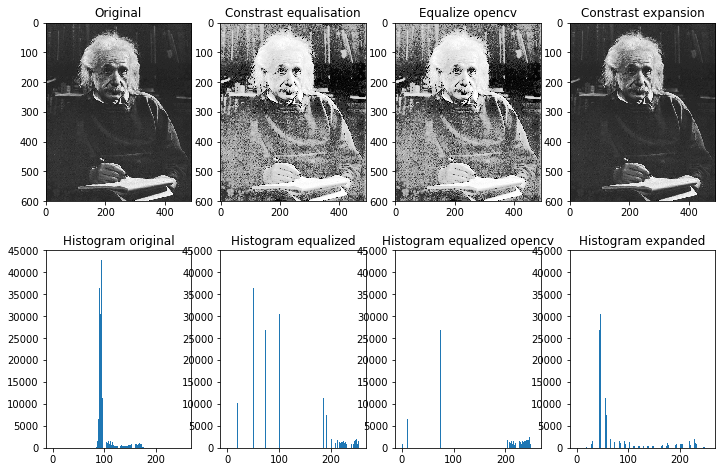

In [33]:
image= cv2.imread("image1.tif",0)
imageEq=equalisation(image)
equ = cv2.equalizeHist(image)
imageEx=expansion(image)
plt.figure(figsize=(12,8))
plt.subplot(2,4,1)
plt.title('Original')
plt.imshow(image,cmap='gray')
plt.subplot(2,4,2)
plt.title('Constrast equalisation')
plt.imshow(imageEq,cmap='gray')
plt.subplot(2,4,3)
plt.title('Equalize opencv')
plt.imshow(equ,cmap='gray')
plt.subplot(2,4,4)
plt.title('Constrast expansion')
plt.imshow(imageEx,cmap='gray')
plt.subplot(2,4,5)
plt.title('Histogram original')
plt.bar(bins,histogram(image))
plt.subplot(2,4,6)
plt.title('Histogram equalized')
plt.bar(bins,histogram(imageEq))
plt.subplot(2,4,7)
plt.title('Histogram equalized opencv')
plt.bar(bins,histogram(equ))
plt.subplot(2,4,8)
plt.title('Histogram expanded')
plt.bar(bins,histogram(imageEx))

<BarContainer object of 256 artists>

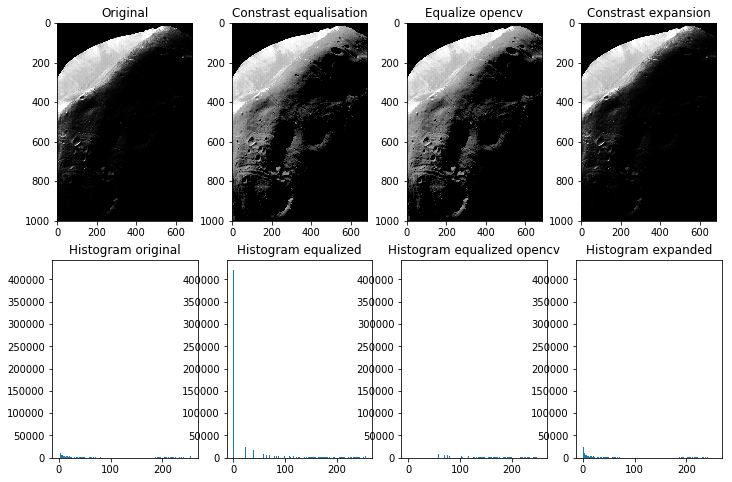

In [38]:
image = cv2.imread("image2.tif",0)
imageEq=equalisation(image)
equ = cv2.equalizeHist(image)
imageEx=expansion(image)
plt.figure(figsize=(12,8))
plt.subplot(2,4,1)
plt.title('Original')
plt.imshow(image,cmap='gray')
plt.subplot(2,4,2)
plt.title('Constrast equalisation')
plt.imshow(imageEq,cmap='gray')
plt.subplot(2,4,3)
plt.title('Equalize opencv')
plt.imshow(equ,cmap='gray')
plt.subplot(2,4,4)
plt.title('Constrast expansion')
plt.imshow(imageEx,cmap='gray')
plt.subplot(2,4,5)
plt.title('Histogram original')
plt.bar(bins,histogram(image))
plt.subplot(2,4,6)
plt.title('Histogram equalized')
plt.bar(bins,histogram(imageEq))
plt.subplot(2,4,7)
plt.title('Histogram equalized opencv')
plt.bar(bins,histogram(equ))
plt.subplot(2,4,8)
plt.title('Histogram expanded')
plt.bar(bins,histogram(imageEx))

<BarContainer object of 256 artists>

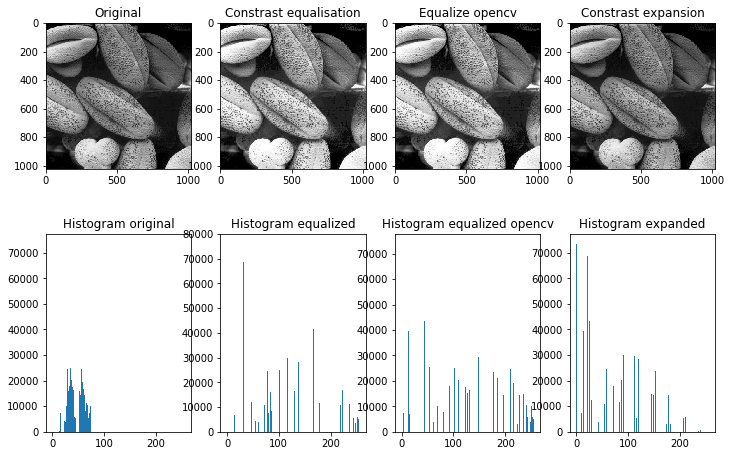

In [35]:
image = cv2.imread("image3.tif",0)
imageEq=equalisation(image)
equ = cv2.equalizeHist(image)
imageEx=expansion(image)
plt.figure(figsize=(12,8))
plt.subplot(2,4,1)
plt.title('Original')
plt.imshow(image,cmap='gray')
plt.subplot(2,4,2)
plt.title('Constrast equalisation')
plt.imshow(imageEq,cmap='gray')
plt.subplot(2,4,3)
plt.title('Equalize opencv')
plt.imshow(equ,cmap='gray')
plt.subplot(2,4,4)
plt.title('Constrast expansion')
plt.imshow(imageEx,cmap='gray')
plt.subplot(2,4,5)
plt.title('Histogram original')
plt.bar(bins,histogram(image))
plt.subplot(2,4,6)
plt.title('Histogram equalized')
plt.bar(bins,histogram(imageEq))
plt.subplot(2,4,7)
plt.title('Histogram equalized opencv')
plt.bar(bins,histogram(equ))
plt.subplot(2,4,8)
plt.title('Histogram expanded')
plt.bar(bins,histogram(imageEx))